## Importación de las librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de los archivos csv

In [2]:
train_csv = './data/train.csv'
test_csv = './data/test.csv'

In [3]:
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

Unimos los datasets en uno solo. Anadimos las etiquitas train y test para diferenciar unos datos de otros

In [4]:
df = pd.concat([train_df, test_df], keys= ['train', 'test'], axis=0)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Para este ejercicio vamos a simplificar el problema y vamos a reducir el número de variables a utilizar a un set de 10 variables más manejables.

| **Nombre**        | **Descripción**                                                                                                   | **Valoración**                                                                                                                                                                     |
|---------------|---------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **OverallQual**   | Calificación de la calidad general de los materiales y acabados (1 a 10).                                     | Es crucial para la predicción del precio, ya que la calidad de construcción y acabados afecta directamente la percepción de valor y atractivo de la propiedad.                   |
| **GrLivArea**     | Área habitable sobre el nivel del suelo en pies cuadrados.                                                    | Un mayor espacio habitable es más deseable y puede alojar a más personas, incrementando la utilidad y valor de la casa.                                                        |
| **Neighborhood**  | Vecindario dentro de los límites de la ciudad de Ames.                                                        | La ubicación puede influir en la seguridad, acceso a servicios, escuelas y otros factores que afectan la calidad de vida, siendo un factor clave en el valor de la propiedad.    |
| **YearBuilt**     | Año de construcción de la casa.                                                                               | Las casas más nuevas suelen tener instalaciones modernas y menos problemas de mantenimiento, lo cual puede elevar el precio de la propiedad.                                   |
| **GarageCars**    | Capacidad del garaje en términos de número de coches.                                                         | Es un indicador de conveniencia y almacenamiento adicional, factores valorados por los compradores, especialmente en áreas suburbanas.                                          |
| **TotalBsmtSF**   | Área total del sótano en pies cuadrados.                                                                      | Un sótano más grande puede incrementar el espacio utilizable, lo que es atractivo para los compradores y puede aumentar el valor de la propiedad.                               |
| **KitchenQual**   | Califica la calidad de la cocina (Ex a Po).                                                                   | La calidad de la cocina puede influir notablemente en la decisión de compra y la disposición a pagar más, ya que es una de las áreas más importantes de una casa.              |
| **FullBath**      | Número de baños completos sobre el nivel del suelo.                                                           | Más baños completos incrementan la comodidad y funcionalidad de la vivienda, especialmente en familias numerosas, siendo un aspecto muy valorado.                               |
| **MSZoning**      | Clasificación general de la zona de la propiedad (Agrícola, Comercial, Residencial, etc.).                    | Afecta las regulaciones y el uso permitido de la propiedad, influyendo en su valor y en las posibilidades de desarrollo o remodelación.                                         |
| **LotArea**       | Tamaño del lote en pies cuadrados.                                                                            | Un terreno más grande puede ofrecer más privacidad, espacio para actividades al aire libre o futuras ampliaciones de la casa, aumentando su atractivo y valor.                  |
| **LotArea**       | Tamaño del lote en pies cuadrados.                                                                            | Un terreno más grande puede ofrecer más privacidad, espacio para actividades al aire libre o futuras ampliaciones de la casa, aumentando su atractivo y valor.                  |

In [6]:
selected_features = ["OverallQual",
    "GrLivArea",
    "Neighborhood",
    "YearBuilt",
    "GarageCars",
    "TotalBsmtSF",
    "KitchenQual",
    "FullBath",
    "MSZoning",
    "LotArea",
    "SalePrice"]

In [7]:
df_backup = df.copy() 

In [8]:
df = df[selected_features]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('train', np.int64(0)) to ('test', np.int64(1458))
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2919 non-null   int64  
 1   GrLivArea     2919 non-null   int64  
 2   Neighborhood  2919 non-null   object 
 3   YearBuilt     2919 non-null   int64  
 4   GarageCars    2918 non-null   float64
 5   TotalBsmtSF   2918 non-null   float64
 6   KitchenQual   2918 non-null   object 
 7   FullBath      2919 non-null   int64  
 8   MSZoning      2915 non-null   object 
 9   LotArea       2919 non-null   int64  
 10  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 303.3+ KB


In [10]:
df.isna().sum()

OverallQual        0
GrLivArea          0
Neighborhood       0
YearBuilt          0
GarageCars         1
TotalBsmtSF        1
KitchenQual        1
FullBath           0
MSZoning           4
LotArea            0
SalePrice       1459
dtype: int64

In [11]:
df.describe()

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,SalePrice
count,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2919.000000,2919.000000,1460.000000
mean,6.089072,1500.759849,1971.312778,1.766621,1051.777587,1.568003,10168.114080,180921.195890
std,1.409947,506.051045,30.291442,0.761624,440.766258,0.552969,7886.996359,79442.502883
min,1.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,1300.000000,34900.000000
25%,5.000000,1126.000000,1953.500000,1.000000,793.000000,1.000000,7478.000000,129975.000000
50%,6.000000,1444.000000,1973.000000,2.000000,989.500000,2.000000,9453.000000,163000.000000
75%,7.000000,1743.500000,2001.000000,2.000000,1302.000000,2.000000,11570.000000,214000.000000
max,10.000000,5642.000000,2010.000000,5.000000,6110.000000,4.000000,215245.000000,755000.000000


In [12]:
df.describe(include = 'object')

,Neighborhood,KitchenQual,MSZoning
count,2919,2918,2915
unique,25,4,5
top,NAmes,TA,RL
freq,443,1492,2265


Text(0.5, 0, 'Precio de venta, US $')

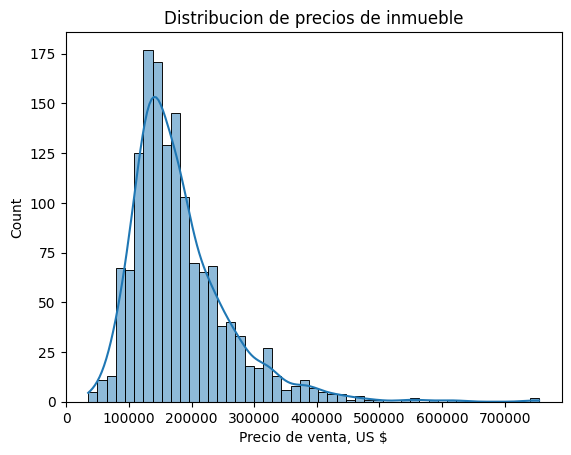

In [13]:
fig, ax = plt.subplots()
sns.histplot(x=df.SalePrice, ax=ax, kde=True)
ax.set_title('Distribucion de precios de inmueble')
ax.set_xlabel('Precio de venta, US $')

In [19]:
df.isna().sum()

OverallQual        0
GrLivArea          0
Neighborhood       0
YearBuilt          0
GarageCars         1
TotalBsmtSF        1
KitchenQual        1
FullBath           0
MSZoning           4
LotArea            0
SalePrice       1459
dtype: int64

In [20]:
data = df.select_dtypes('number').corr()

In [21]:
data

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,SalePrice
OverallQual,1.000000,0.575126,0.597554,0.600744,0.549294,0.528483,0.100541,0.790982
GrLivArea,0.575126,1.000000,0.242666,0.489933,0.445276,0.630286,0.284519,0.708624
YearBuilt,0.597554,0.242666,1.000000,0.538074,0.408515,0.471169,0.024128,0.522897
GarageCars,0.600744,0.489933,0.538074,1.000000,0.437997,0.479988,0.180434,0.640409
TotalBsmtSF,0.549294,0.445276,0.408515,0.437997,1.000000,0.327762,0.254138,0.613581
FullBath,0.528483,0.630286,0.471169,0.479988,0.327762,1.000000,0.125826,0.560664
LotArea,0.100541,0.284519,0.024128,0.180434,0.254138,0.125826,1.000000,0.263843
SalePrice,0.790982,0.708624,0.522897,0.640409,0.613581,0.560664,0.263843,1.000000


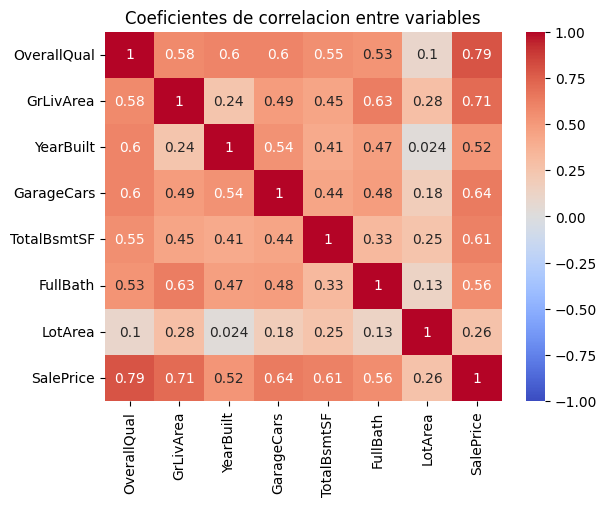

In [16]:
fig, ax = plt.subplots()
sns.heatmap(data, cmap='coolwarm', vmin=-1, vmax=1, center=0, annot=True, ax= ax)
ax.set_title('Coeficientes de correlacion entre variables')
plt.show()

Preprocesamiento de datos

In [34]:
df.isna().sum()

OverallQual        0
GrLivArea          0
Neighborhood       0
YearBuilt          0
GarageCars         0
TotalBsmtSF        0
KitchenQual        0
FullBath           0
MSZoning           0
LotArea            0
SalePrice       1459
dtype: int64

In [29]:
df.select_dtypes('number').isna().sum()

OverallQual       0
GrLivArea         0
YearBuilt         0
GarageCars        0
TotalBsmtSF       0
FullBath          0
LotArea           0
SalePrice      1459
dtype: int64

In [20]:
df.loc[:,'TotalBsmtSF'] = df.TotalBsmtSF.fillna(df.TotalBsmtSF.mean())

In [28]:
df.loc[:,'GarageCars'] = df.GarageCars.fillna(df.GarageCars.mode()[0])

In [30]:
df.select_dtypes('object').isna().sum()

Neighborhood    0
KitchenQual     1
MSZoning        4
dtype: int64

In [32]:
df.loc[:,'MSZoning'] = df.MSZoning.fillna(df.MSZoning.mode()[0])

In [33]:
df.loc[:,'KitchenQual'] = df.KitchenQual.fillna(df.KitchenQual.mode()[0])

Dividir el dataset en datos de entrenamiento y los datos a predecir:

In [50]:
X = df.iloc[:,:-1]

Preprocesamiento de los datos:

In [56]:
X.sample(5)

OverallQual  GrLivArea Neighborhood  YearBuilt  GarageCars  \
train 1208            5       1283        NAmes       1962         2.0   
      969             6       1095        NAmes       1958         1.0   
      1051            7       1316      CollgCr       2007         2.0   
test  588             5       1728        NAmes       1965         2.0   
      900             5       1040       Sawyer       1968         2.0   

            TotalBsmtSF KitchenQual  FullBath MSZoning  LotArea  
train 1208        931.0          TA         1       RL     7763  
      969         588.0          TA         1       RL    10382  
      1051       1316.0          Gd         2       RL    11175  
test  588        1728.0          TA         2       RL    11072  
      900        1040.0          TA         1       RL     7476

In [57]:
X_numerical = X.select_dtypes('number')
X_categorical = X.select_dtypes('object')

In [58]:
X_numerical.sample(5)

OverallQual  GrLivArea  YearBuilt  GarageCars  TotalBsmtSF  \
train 875             8       2610       2007         2.0       1184.0   
test  1302            6       1773       1961         2.0       1313.0   
train 1136            6       1252       1950         1.0       1032.0   
test  1119            5       1991       1895         0.0        957.0   
      948             5       1144       1960         1.0       1144.0   

            FullBath  LotArea  
train 875          2     9000  
test  1302         2    10800  
train 1136         1     9600  
test  1119         2     8250  
      948          1     9100

In [59]:
from sklearn.preprocessing import StandardScaler

In [63]:
sd_scaler = StandardScaler()

In [61]:
numeric_features = X_numerical.columns

In [72]:
sd_scaler.fit_transform(X_numerical['OverallQual'].values.reshape(1,-1))

array([[0., 0., 0., ..., 0., 0., 0.]])

In [73]:
for col in X_numerical.columns:
    X_numerical[col] = sd_scaler.fit_transform(X_numerical[col].to_frame())

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
encoder = LabelEncoder()

In [79]:
for col in X_categorical.columns:
    X_categorical[col] = encoder.fit_transform(X_categorical[col])

In [81]:
X_numerical.isna().sum()

OverallQual    0
GrLivArea      0
YearBuilt      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
LotArea        0
dtype: int64

In [82]:
X_categorical.isna().sum()

Neighborhood    0
KitchenQual     0
MSZoning        0
dtype: int64

Tras el preprocesamiento, reunir de nuevo los dos datasets: variables numericas y categoricas.

In [83]:
X = pd.concat([X_numerical, X_categorical], axis=1)

Separar los datos en entrenamiento y test:

In [90]:
test_size = 0.2
random_state = 29

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_training = X.loc['train']
X_testing = X.loc['test']

In [93]:
y = df.iloc[:,-1]
y_training = y.loc['train']
y_testing = y.loc['test']

In [98]:
X_train, X_eval, y_train, y_eval = train_test_split(X_training, y_training, test_size = test_size, random_state = random_state)

Creamos el modelo de regresion lineal

In [87]:
from sklearn.linear_model import LinearRegression

In [99]:
linear_reg = LinearRegression()

In [100]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [102]:
y_pred = linear_reg.predict(X_eval)

Evaluar el modelo con parametros:

In [103]:
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
mse = mean_squared_error(y_eval, y_pred)
r2 = r2_score(y_eval, y_pred)

In [106]:
print(f'El error cuadratico medio es: {mse:.2f} y el coeficiente de determinacion (R2) es: {r2:.2f}')

El error cuadratico medio es: 2015109194.98 y el coeficiente de determinacion (R2) es: 0.60


Estimacion de los datos de test para envio a Kaggle:

In [112]:
pred_SalePrice = linear_reg.predict(X_testing)

In [114]:
kaggle_results = pd.DataFrame({'Id' : test_df['Id'], 'SalePrice' : pred_SalePrice})

In [115]:
kaggle_results

,Id,SalePrice
0,1461,105559.165733
1,1462,178672.775756
2,1463,163387.053815
3,1464,191715.761111
4,1465,217882.069068
...,...,...
1454,2915,72968.658186
1455,2916,84075.595943
1456,2917,152374.014911
1457,2918,109007.440505
